# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
k = tf.keras

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [74]:
df = pd.read_csv('Frozen_Dessert_Production.csv', parse_dates=True, index_col='DATE')
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


**Task: Change the column name to Production**

In [76]:
df.columns = ['Production']
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**TASK: Plot out the time series**

<Axes: xlabel='DATE'>

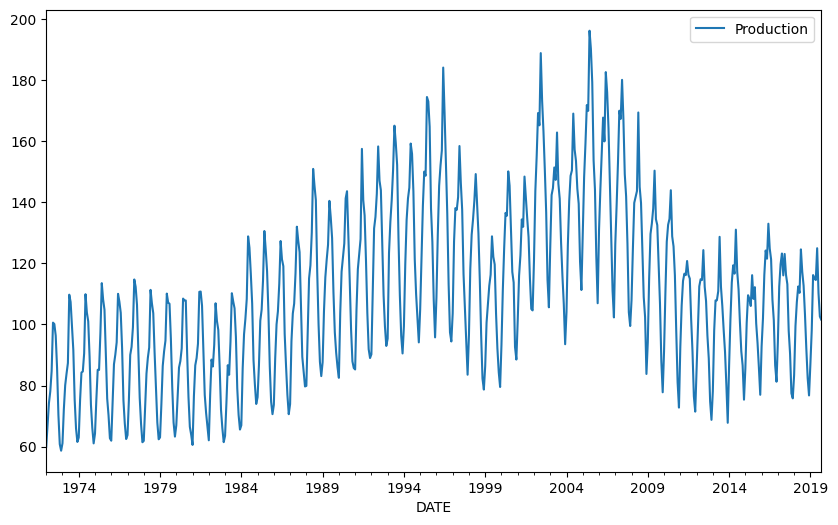

In [77]:
df.plot(figsize=(10, 6))

## Train Test Split

**TASK: Figure out the length of the data set**

In [78]:
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [79]:
train = df[:-24]

In [80]:
test = df[-24:]

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [82]:
length = 18

In [83]:
batch_size = 1

In [84]:
generator = k.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [85]:
model = k.Sequential()
model.add(k.layers.LSTM(128, activation='relu', recurrent_initializer='glorot_uniform', dropout=0.2, return_sequences=True, input_shape=(length, 1)))
model.add(k.layers.LSTM(32, activation='relu', recurrent_initializer='glorot_uniform'))
model.add(k.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 18, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 87,201
Trainable params: 87,201
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [87]:
validate_generator = k.preprocessing.sequence.TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [88]:
callback = k.callbacks.EarlyStopping(patience=5)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [89]:
model.fit(generator, validation_data=validate_generator, epochs=20, callbacks=[callback])

Epoch 1/20


2023-05-19 13:00:09.898814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


528/531 [============================>.] - ETA: 0s - loss: 0.0333

2023-05-19 13:00:20.620841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


531/531 [==============================] - 11s 16ms/step - loss: 0.0333 - val_loss: 0.0151
Epoch 2/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0235 - val_loss: 0.0018
Epoch 3/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0136 - val_loss: 0.0072
Epoch 4/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 5/20
531/531 [==============================] - 8s 15ms/step - loss: 0.0090 - val_loss: 0.0046
Epoch 6/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0078 - val_loss: 0.0197
Epoch 7/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0078 - val_loss: 9.9641e-04
Epoch 8/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0066 - val_loss: 0.0079
Epoch 9/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0060 - val_loss: 0.0116
Epoch 10/20
531/531 [==============================] - 8s 15ms/step - loss: 0.0062 - val_loss: 0.

**TASK: Plot the history of the loss that occured during training.**

<Axes: >

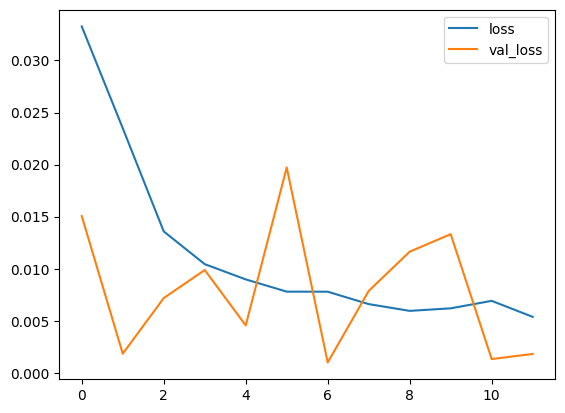

In [90]:
pd.DataFrame(model.history.history).plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [91]:
test_predictions = []

batch_for_pred = scaled_train[-length:].reshape(1, length, 1)
for i in range(len(test)):
    pred = model.predict(batch_for_pred)
    test_predictions.append(pred)
    batch_for_pred = np.append(batch_for_pred[:, 1:, :], [pred], axis=1)

1/1 [==============================] - 0s 40ms/step


In [92]:
test_predictions = np.array(test_predictions).reshape(-1, 1)

In [93]:
test_predictions = scaler.inverse_transform(test_predictions)

In [94]:
predictions = pd.DataFrame(test_predictions, index=test.index, columns=['Predictions'])
test_pred = pd.concat([test, predictions], axis=1)
test_pred

,Production,Predictions
DATE,,
2017-10-01,90.4732,90.761261
2017-11-01,77.4378,81.901726
2017-12-01,75.8118,76.733322
2018-01-01,83.4343,93.051559
2018-02-01,99.4899,106.409546
2018-03-01,107.3152,115.471832
2018-04-01,112.4309,120.695961
2018-05-01,110.3544,124.471718
2018-06-01,124.5841,123.204697


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

<Axes: xlabel='DATE'>

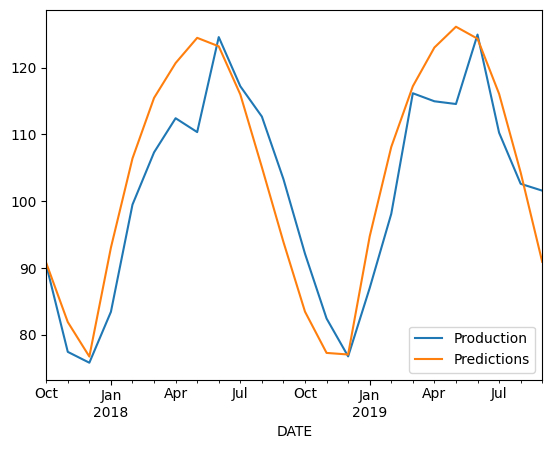

In [95]:
test_pred.plot()

**TASK: Calculate your RMSE.**

In [96]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test_pred['Production'], test_pred['Predictions']))

7.239373118357241